In [1]:
# This code is to test Louvain Method with custom Modularity Function
import numpy as np
import networkx as nx
import networkx.algorithms.community.quality as nx_quality
import networkx.algorithms.community as nx_comm

from Custom_Func import directed_modularity, modularity, _one_level

## Sample Graph

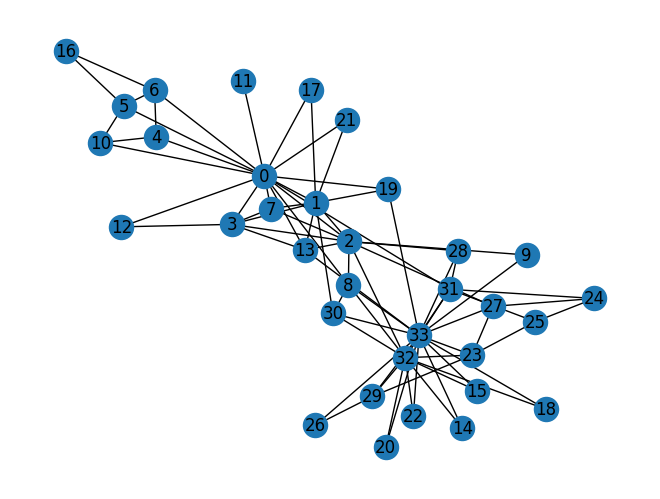

In [2]:
G = nx.karate_club_graph()
#visualize
nx.draw(G, with_labels=True)
#print(G.edges(data=True))

## Louvain Method with Original Q (Modularity) Function

In [3]:
#Louvain with Normal Q 
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")

Set 1: [{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {8, 30}, {10, 4}, {16, 5, 6}, {32, 33, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29}, {24, 25, 28, 31}]
Set 2: [{0, 1, 2, 3, 7, 11, 12, 13, 17, 19, 21}, {16, 4, 5, 6, 10}, {32, 33, 8, 9, 14, 15, 18, 20, 22, 23, 26, 27, 29, 30}, {24, 25, 28, 31}]


## Louvain Method with Custom Q (Modularity) Function using Monkey Patch (Overload)

Set 1: [{0, 7}, {1, 21}, {2, 27}, {3, 13}, {10, 4}, {5, 6}, {8, 30}, {9}, {11}, {12}, {14}, {15}, {16}, {17}, {18}, {19}, {24, 31}, {25, 23}, {26, 29}, {28}, {32, 20}, {33, 22}]


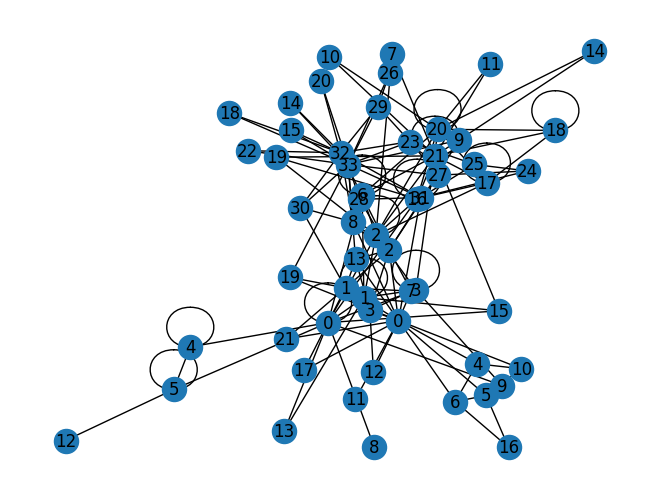

In [4]:
#Louvain with Custom Q (+1 for every community of size 2 / 0 else)
nx_quality.modularity=modularity
nx_comm.louvain._one_level=_one_level
partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")
#


    

# Directed Graph

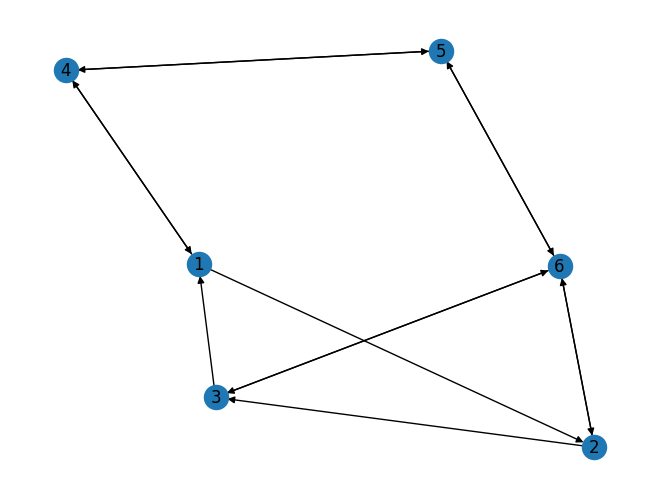

In [5]:
#Directed graph example
G = nx.DiGraph()
G.add_edges_from([(1,2),(2,3),(3,1),(1,4),(4,1),(4,5),(5,4),(5,6),(6,5),(6,3),(3,6),(6,2),(2,6)])
#visualize
nx.draw(G, with_labels=True)


## Custom Directed_Modularity

[(1, 2, {'weight': 1}), (1, 4, {'weight': 1}), (2, 3, {'weight': 1}), (2, 6, {'weight': 1}), (3, 1, {'weight': 1}), (3, 6, {'weight': 1}), (4, 1, {'weight': 1}), (4, 5, {'weight': 1}), (5, 4, {'weight': 1}), (5, 6, {'weight': 1}), (6, 5, {'weight': 1}), (6, 3, {'weight': 1}), (6, 2, {'weight': 1})]
Set 1: [{1}, {2}, {4, 5}, {3, 6}]


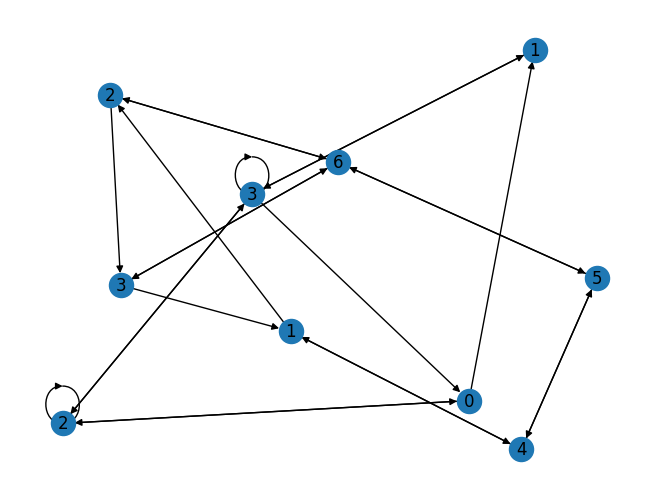

In [6]:

nx_quality.modularity=directed_modularity

#Custom directed modularity
# Q_c = 1 if nodes in community c have more than 2 inter-community edges, 0 otherwise
# Q = sum of all Q_c for all community c

#Set every edge weight to 1
for u,v in G.edges():
    G[u][v]['weight']=1

#print the edge weights
print(G.edges(data=True))

partition = nx_comm.louvain.louvain_partitions(G, seed=0)
#Loop through the partition. It is a list of sets
for i, s in enumerate(partition, start=1):
    print(f"Set {i}: {s}")
#